In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv("/home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/SDN_traffic.csv") 

X = data[["forward_bps_var", "tp_src", "tp_dst", "nw_proto", "forward_pc", "forward_bc", "forward_pl", 
    "forward_piat", "forward_pps", "forward_bps", "forward_pl_mean", "forward_piat_mean", 
    "forward_pps_mean", "forward_bps_mean", "forward_pl_var", "forward_piat_var", 
    "forward_pps_var", "forward_pl_q1", "forward_pl_q3", "forward_piat_q1", 
    "forward_piat_q3", "forward_pl_max", "forward_pl_min", "forward_piat_max", 
    "forward_piat_min", "forward_pps_max", "forward_pps_min", "forward_bps_max", 
    "forward_bps_min", "forward_duration", "forward_size_packets", "forward_size_bytes", 
    "reverse_pc", "reverse_bc", "reverse_pl", "reverse_piat", "reverse_pps", "reverse_bps", 
    "reverse_pl_mean", "reverse_piat_mean", "reverse_pps_mean", "reverse_bps_mean", 
    "reverse_pl_var", "reverse_piat_var", "reverse_pps_var", "reverse_bps_var", 
    "reverse_pl_q1", "reverse_pl_q3", "reverse_piat_q1", "reverse_piat_q3", 
    "reverse_pl_max", "reverse_pl_min", "reverse_piat_max", "reverse_piat_min", 
    "reverse_pps_max", "reverse_pps_min", "reverse_bps_max", "reverse_bps_min", 
    "reverse_duration", "reverse_size_packets", "reverse_size_bytes"
]]


X.loc[1877, 'forward_bps_var'] = float(11968065203349.0)
X.loc[1931, 'forward_bps_var'] = float(12880593804833.0)
X.loc[2070, 'forward_bps_var'] = float(9022747730895.0)
X.loc[2381, 'forward_bps_var'] = float(39987497172945.0)
X.loc[2562, 'forward_bps_var'] = float(663300742992.0)
X.loc[2567, 'forward_bps_var'] = float(37770223877794.0)
X.loc[2586, 'forward_bps_var'] = float(97227875083751.0)
X.loc[2754, 'forward_bps_var'] = float(18709751403737.0)
X.loc[2765, 'forward_bps_var'] = float(33969277035759.0)
X.loc[2904, 'forward_bps_var'] = float(39204786962856.0)
X.loc[3044, 'forward_bps_var'] = float(9169996063653.0)
X.loc[3349, 'forward_bps_var'] = float(37123283690575.0)
X.loc[3507, 'forward_bps_var'] = float(61019064590464.0)
X.loc[3610, 'forward_bps_var'] = float(46049620984072.0)
X.loc[3717, 'forward_bps_var'] = float(97158873841506.0)
X.loc[3845, 'forward_bps_var'] = float(11968865203349.0)
X.loc[3868, 'forward_bps_var'] = float(85874278395372.0)


Y = data[["category"]]
Y = Y.to_numpy()
Y = Y.ravel()

labels, uniques = pd.factorize(Y)
Y = labels
Y = Y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Processing file: /home/benjamin/Documents/Ensicaen/3A_riga/Cours/Telecom-software/Task 5/SDN_traffic.csv


In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
accuracy = clf.score(X_test, y_test)
KFold10_accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(KFold10_accuracy.mean())

predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict)
precision = precision_score(y_test, predict, average='weighted', labels=np.unique(predict))
recall = recall_score(y_test, predict, average='weighted', labels=np.unique(predict))
f1scoremacro = f1_score(y_test, predict, average='macro', labels=np.unique(predict))
print(classification_report(y_test, predict, target_names=uniques))


0.7549335846817127
              precision    recall  f1-score   support

         WWW       0.86      0.84      0.85       484
         DNS       0.68      0.67      0.68        39
        VOIP       0.37      0.42      0.39        53
        ICMP       0.42      0.47      0.44        85
         FTP       0.44      0.41      0.42        41
         P2P       0.98      0.94      0.96       145

    accuracy                           0.77       847
   macro avg       0.62      0.62      0.62       847
weighted avg       0.78      0.77      0.77       847



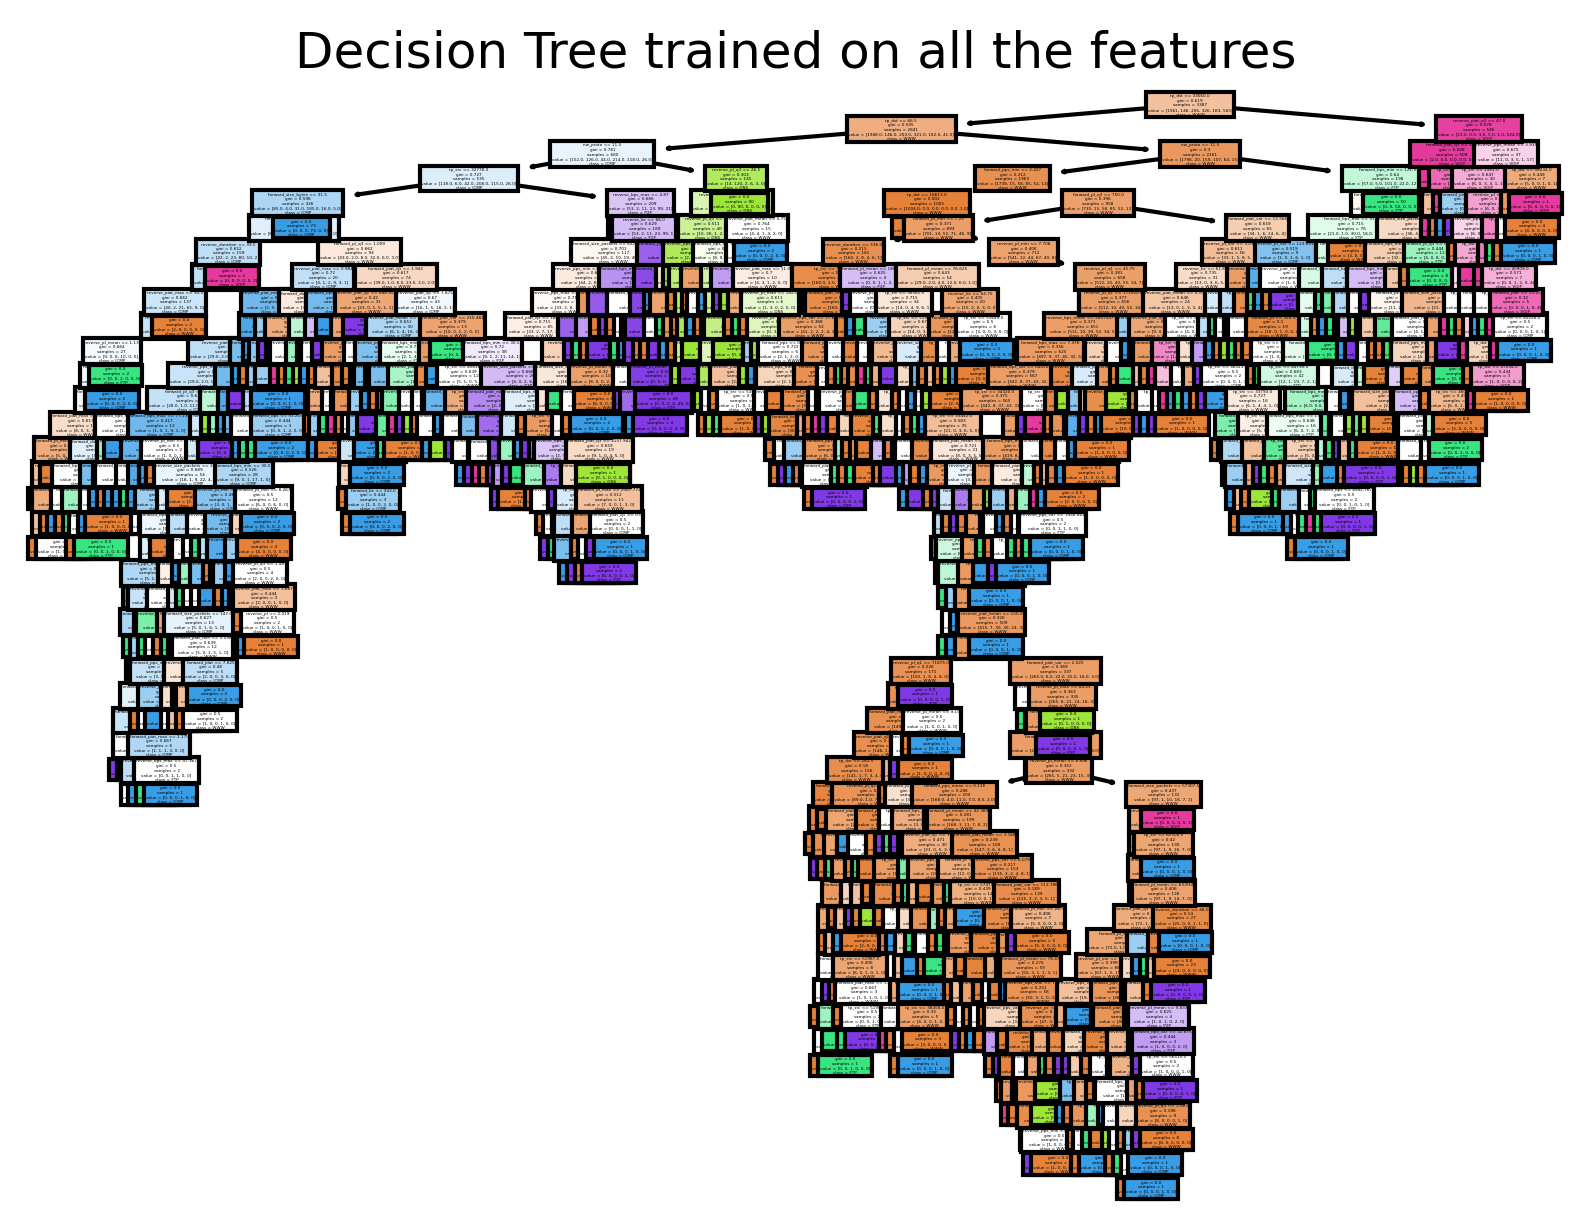

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

fn = ["forward_bps_var", "tp_src", "tp_dst", "nw_proto", "forward_pc", "forward_bc", "forward_pl", 
    "forward_piat", "forward_pps", "forward_bps", "forward_pl_mean", "forward_piat_mean", 
    "forward_pps_mean", "forward_bps_mean", "forward_pl_var", "forward_piat_var", 
    "forward_pps_var", "forward_pl_q1", "forward_pl_q3", "forward_piat_q1", 
    "forward_piat_q3", "forward_pl_max", "forward_pl_min", "forward_piat_max", 
    "forward_piat_min", "forward_pps_max", "forward_pps_min", "forward_bps_max", 
    "forward_bps_min", "forward_duration", "forward_size_packets", "forward_size_bytes", 
    "reverse_pc", "reverse_bc", "reverse_pl", "reverse_piat", "reverse_pps", "reverse_bps", 
    "reverse_pl_mean", "reverse_piat_mean", "reverse_pps_mean", "reverse_bps_mean", 
    "reverse_pl_var", "reverse_piat_var", "reverse_pps_var", "reverse_bps_var", 
    "reverse_pl_q1", "reverse_pl_q3", "reverse_piat_q1", "reverse_piat_q3", 
    "reverse_pl_max", "reverse_pl_min", "reverse_piat_max", "reverse_piat_min", 
    "reverse_pps_max", "reverse_pps_min", "reverse_bps_max", "reverse_bps_min", 
    "reverse_duration", "reverse_size_packets", "reverse_size_bytes"
]

la = ['WWW', 'DNS', 'FTP', 'ICMP', 'P2P', 'VOIP']
plt.figure(1, dpi=300)
fig = tree.plot_tree(clf, feature_names=fn, class_names=la, filled=True)
plt.title("Decision Tree trained on all the features")
plt.show()

<Axes: title={'center': 'Confusion Matrix'}>

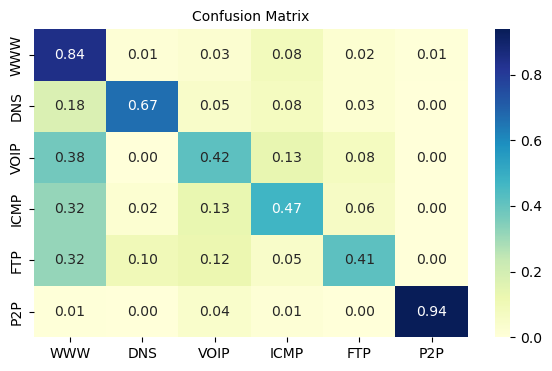

In [12]:
import seaborn as sn

labels = uniques 
plt.figure(2, figsize=(7, 4))
plt.title("Confusion Matrix", fontsize=10)

cmnew = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sn.heatmap(cmnew, annot=True, cmap='YlGnBu', fmt=".2f", xticklabels=labels, yticklabels=labels)

In [13]:
# ID3 Decision Tree
clf_id3 = DecisionTreeClassifier(criterion='entropy')
clf_id3.fit(X_train, y_train)

# CART Decision Tree
clf_cart = DecisionTreeClassifier(criterion='gini')
clf_cart.fit(X_train, y_train)

# Predict using both classifiers
predictions_id3 = clf_id3.predict(X_test)
predictions_cart = clf_cart.predict(X_test)

# Evaluate performance
accuracy_id3 = np.mean(predictions_id3 == y_test)
accuracy_cart = np.mean(predictions_cart == y_test)

print(f"ID3 Accuracy: {accuracy_id3}")
print(f"CART Accuracy: {accuracy_cart}")

# Generate classification reports
report_id3 = classification_report(y_test, predictions_id3, target_names=uniques)
report_cart = classification_report(y_test, predictions_cart, target_names=uniques)

print("ID3 Classification Report:")
print(report_id3)

print("CART Classification Report:")
print(report_cart)

ID3 Accuracy: 0.7768595041322314
CART Accuracy: 0.7721369539551358
ID3 Classification Report:
              precision    recall  f1-score   support

         WWW       0.85      0.85      0.85       484
         DNS       0.74      0.67      0.70        39
        VOIP       0.40      0.51      0.45        53
        ICMP       0.52      0.47      0.49        85
         FTP       0.41      0.41      0.41        41
         P2P       0.96      0.94      0.95       145

    accuracy                           0.78       847
   macro avg       0.65      0.64      0.64       847
weighted avg       0.78      0.78      0.78       847

CART Classification Report:
              precision    recall  f1-score   support

         WWW       0.86      0.85      0.85       484
         DNS       0.72      0.67      0.69        39
        VOIP       0.37      0.43      0.40        53
        ICMP       0.44      0.49      0.46        85
         FTP       0.44      0.39      0.42        41
         P